  **Optimization of Blockchain Network**


**Name : M.Ammar Ali Khan , Murtaza Ahmed , Zain-Al-Abideen**

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Loading Dataset**

In [4]:
df = pd.read_csv("blockchain_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          15000 non-null  int64  
 1   Block Number            15000 non-null  int64  
 2   Sender Address          15000 non-null  object 
 3   Receiver Address        15000 non-null  object 
 4   Value (ETH)             15000 non-null  float64
 5   Gas Used                15000 non-null  float64
 6   Gas Price (Gwei)        15000 non-null  float64
 7   Network Latency (ms)    15000 non-null  float64
 8   Timestamp               15000 non-null  object 
 9   Congestion Category     15000 non-null  object 
 10  Volume                  15000 non-null  float64
 11  Pending Transactions    15000 non-null  int64  
 12  Block Size Use          15000 non-null  float64
 13  Block Propagation Time  15000 non-null  float64
dtypes: float64(7), int64(3), object(4)
mem

In [5]:
display(df)

,Transaction ID,Block Number,Sender Address,Receiver Address,Value (ETH),Gas Used,Gas Price (Gwei),Network Latency (ms),Timestamp,Congestion Category,Volume,Pending Transactions,Block Size Use,Block Propagation Time
0,1,1,0x4938f8434d20ace70b91a501eb7f7d564a6dce79,0x751595078d42129b2ee62016f5e142a9ec1759e8,37.516558,2.894901,6.743301,114.148033,2024-01-01 00:00:00,high,37.516558,108,0.299868,5.541307
1,2,2,0x3e54c00dd94d4e3b56e3861099853a55cd6384ab,0x8bf5ec3e9399999662ef981a95d0d2f3d8b6a754,95.076359,4.376096,5.133632,421.406386,2024-01-01 01:00:00,high,95.076359,416,0.398699,5.343098
2,3,3,0x6da8862f9ea1563b847ff7324983062285079572,0x348e59e1170f29fd1a53f60534e97bb70fad6bbd,73.226195,9.631675,9.680487,708.476002,2024-01-01 02:00:00,high,73.226195,705,0.325067,3.185110
3,4,4,0xa11b3595b307f22e1b5a6ff4ed31cb5aafc18dce,0x0526a1283c58de4fb9c8aa46daf753d261875402,59.905983,2.656978,2.970806,163.851902,2024-01-01 03:00:00,high,59.905983,159,0.133321,4.683028
4,5,5,0x7af3117ad94ffb95d1c1b5cc4747576e9a93c825,0x775583f8eda5a0fcfdc7541a45c69582b3286c08,15.686262,2.831341,6.290708,50.577019,2024-01-01 04:00:00,high,15.686262,44,0.174232,6.163860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,14996,0x7e1fdc30658c6671cda62dbce3312daecd8003fb,0xd475e2919474669ecc77feb985b65c1b325d9962,65.123260,2.681824,2.740765,178.763029,2025-09-16 19:00:00,high,65.123260,174,0.480910,4.113906
14996,14997,14997,0x48c90db4c1b04c1305a9191ee41bea2608aed315,0x5cd997241b503f3788c27b5891a7a876cf03d6c1,17.862054,2.073089,3.875064,41.518953,2025-09-16 20:00:00,high,17.862054,37,0.399130,4.489332
14997,14998,14998,0x41614a3155ce53a46b354f0aba26bf3f5f5139b2,0x34f7a23c1117a9b7fe098faa6b5b9181e7358635,5.218830,1.969071,4.180672,17.932447,2025-09-16 21:00:00,high,5.218830,10,0.107782,7.656201
14998,14999,14999,0x878928f2b593d99cfbf4656d629a805ac5ceea23,0x8d2d420267944eb2f47c80841fc7b6ef59e026fd,68.327863,2.051565,3.581398,144.028552,2025-09-16 22:00:00,high,68.327863,140,0.260402,3.849501


**Check for Missing Values**

In [6]:
missing_values = df.isnull().sum()

print(missing_values)


Transaction ID            0
Block Number              0
Sender Address            0
Receiver Address          0
Value (ETH)               0
Gas Used                  0
Gas Price (Gwei)          0
Network Latency (ms)      0
Timestamp                 0
Congestion Category       0
Volume                    0
Pending Transactions      0
Block Size Use            0
Block Propagation Time    0
dtype: int64


**Pre-process the data for the models**

In [7]:
import pandas as pd

def preprocess_dataset(df):
    df.drop(['Transaction ID', 'Sender Address', 'Receiver Address', 'Timestamp'], axis=1, inplace=True)
    df['Congestion Category'].fillna(df['Congestion Category'].mode()[0], inplace=True)
    numerical_features = ['Block Number', 'Value (ETH)', 'Gas Price (Gwei)', 'Network Latency (ms)', 'Volume', 'Pending Transactions', 'Block Size Use', 'Block Propagation Time']
    for feature in numerical_features:
        if feature != 'Gas Used':
            min_val = df[feature].min()
            max_val = df[feature].max()
            df[feature] = (df[feature] - min_val) / (max_val - min_val)

    categorical_features = ['Congestion Category']
    df = pd.get_dummies(df, columns=categorical_features)

    return df


preprocessed_df = preprocess_dataset(df.copy())


**Preprocessed Columns**

In [ ]:
print(preprocessed_df.columns)


Index(['Block Number', 'Value (ETH)', 'Gas Used', 'Gas Price (Gwei)',
       'Network Latency (ms)', 'Volume', 'Pending Transactions',
       'Block Size Use', 'Block Propagation Time', 'Congestion Category_high',
       'Congestion Category_low', 'Congestion Category_medium'],
      dtype='object')


**Line Plot of Network Latency (ms) Over Time (Block Number)**


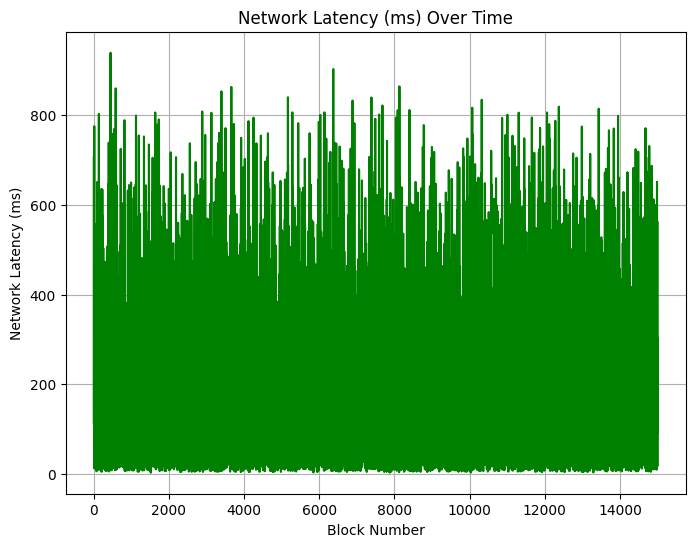

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df['Block Number'], df['Network Latency (ms)'], color='green')
plt.title('Network Latency (ms) Over Time')
plt.xlabel('Block Number')
plt.ylabel('Network Latency (ms)')
plt.grid(True)
plt.show()


**Bar Chart of Volume**

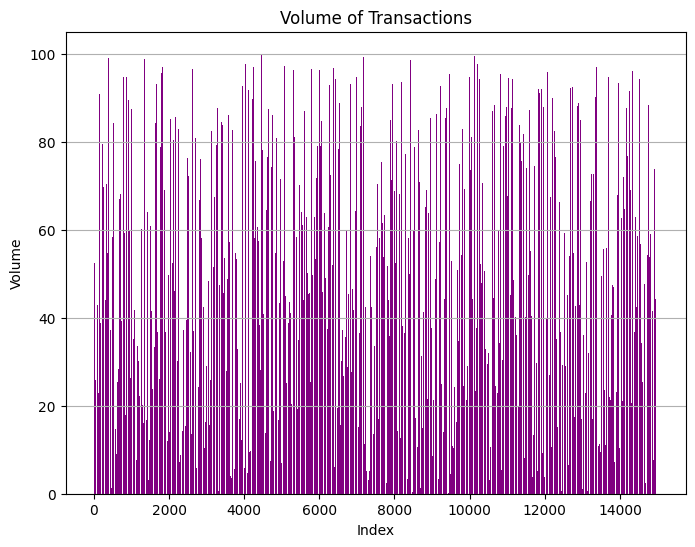

In [ ]:

plt.figure(figsize=(8, 6))
plt.bar(df.index, df['Volume'], color='purple')
plt.title('Volume of Transactions')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.grid(axis='y')
plt.show()

**3D scatter plot for Congestion Category**

In [ ]:
import plotly.graph_objs as go

color_map = {
    'low': 'green',
    'medium': 'orange',
    'high': 'red'
}

color_values = df['Congestion Category'].map(color_map)

fig = go.Figure(data=[go.Scatter3d(
    x=df['Gas Price (Gwei)'],
    y=df['Volume'],
    z=df['Congestion Category'],
    mode='markers',
    marker=dict(
        size=5,
        color=color_values,
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Gas Price (Gwei)',
        yaxis_title='Volume',
        zaxis_title='Congestion Category'
    ),
    title='3D Scatter Plot of Gas Price (Gwei), Volume, and Congestion Category'
)

fig.show()


**Correlation Matrix**

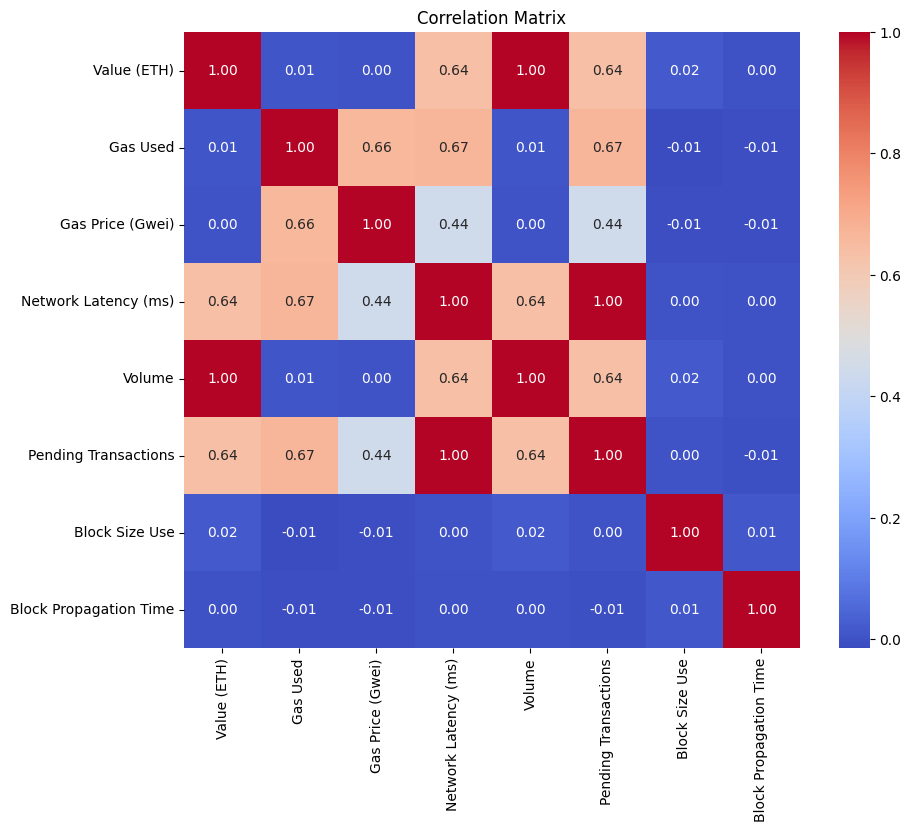

In [ ]:
import seaborn as sns

selected_columns = ['Value (ETH)', 'Gas Used', 'Gas Price (Gwei)', 'Network Latency (ms)',
                    'Volume', 'Pending Transactions', 'Block Size Use', 'Block Propagation Time']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


**Box Plot for Congestion Category**

<ipython-input-25-b6a555285691>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




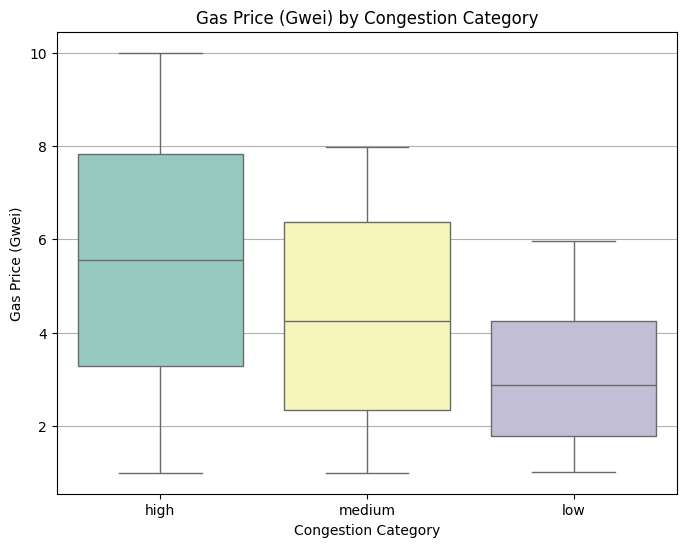

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Congestion Category', y='Gas Price (Gwei)', data=df, palette='Set3')
plt.title('Gas Price (Gwei) by Congestion Category')
plt.xlabel('Congestion Category')
plt.ylabel('Gas Price (Gwei)')
plt.grid(axis='y')
plt.show()


**Correlation of other Columns with Network Congestion**

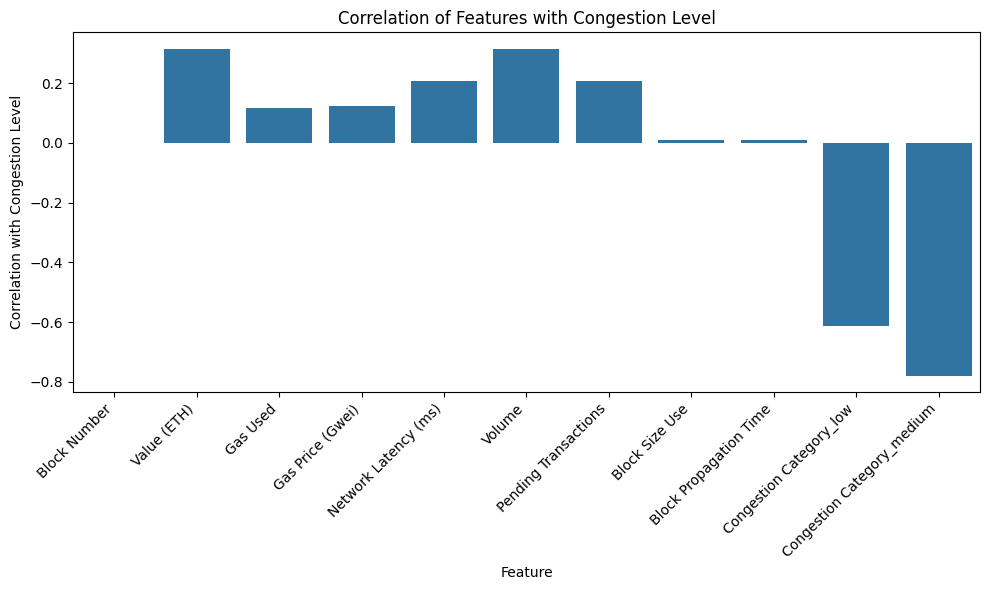

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = preprocessed_df.corr()
congestion_correlation = correlation_matrix['Congestion Category_high'].drop('Congestion Category_high')

plt.figure(figsize=(10, 6))
sns.barplot(x=congestion_correlation.index, y=congestion_correlation.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Correlation with Congestion Level')
plt.title('Correlation of Features with Congestion Level')
plt.tight_layout()
plt.show()


**Correlation of other columns with Network Latency**

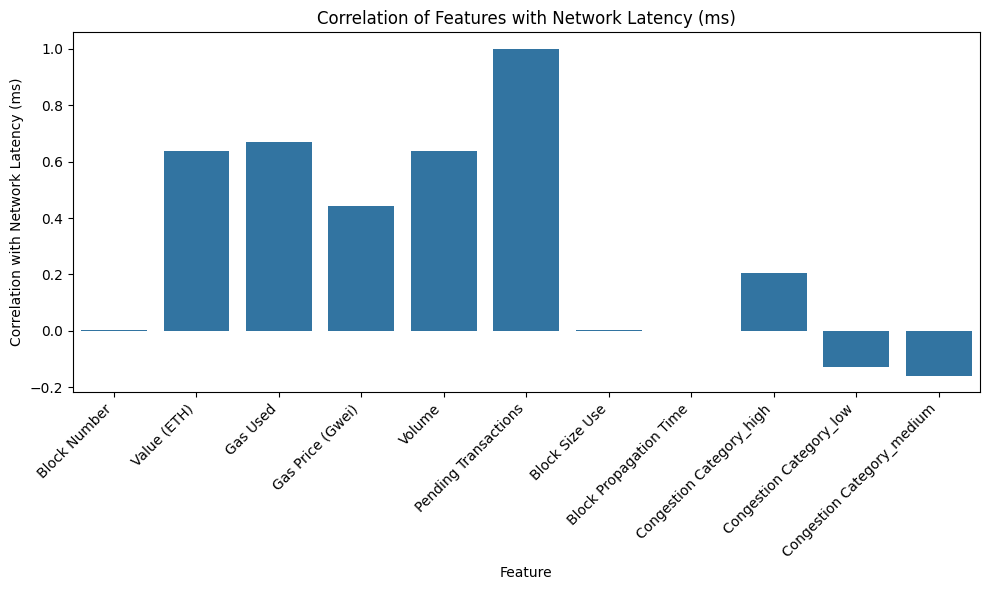

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = preprocessed_df.corr()
latency_correlation = correlation_matrix['Network Latency (ms)'].drop('Network Latency (ms)')

plt.figure(figsize=(10, 6))
sns.barplot(x=latency_correlation.index, y=latency_correlation.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Correlation with Network Latency (ms)')
plt.title('Correlation of Features with Network Latency (ms)')
plt.tight_layout()
plt.show()


**Network Latency with RandomForest Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = preprocessed_df.drop('Network Latency (ms)', axis=1)
y = preprocessed_df['Network Latency (ms)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_latency = RandomForestRegressor(n_estimators=100, random_state=42)
model_latency.fit(X_train, y_train)
y_pred_latency = model_latency.predict(X_test)

mse_latency = mean_squared_error(y_test, y_pred_latency)
print("Mean Squared Error (Latency):", mse_latency)


Mean Squared Error (Latency): 2.9980119060071857e-07


**Optimization model for network Congestion with Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = preprocessed_df.drop(['Congestion Category_high', 'Congestion Category_low', 'Congestion Category_medium'], axis=1)
y = preprocessed_df[['Congestion Category_high', 'Congestion Category_low', 'Congestion Category_medium']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_congestion = RandomForestClassifier(n_estimators=100, random_state=42)
model_congestion.fit(X_train, y_train)
y_pred_congestion = model_congestion.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_congestion)
print("Accuracy (Network Congestion):", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_congestion))


Accuracy (Network Congestion): 0.9996666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2903
           1       1.00      1.00      1.00        33
           2       1.00      0.98      0.99        64

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      0.99      1.00      3000
weighted avg       1.00      1.00      1.00      3000
 samples avg       1.00      1.00      1.00      3000



**Network Congestion with LSTM**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder

X = preprocessed_df.drop(['Congestion Category_high', 'Congestion Category_low', 'Congestion Category_medium'], axis=1)
y = preprocessed_df[['Congestion Category_high', 'Congestion Category_low', 'Congestion Category_medium']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
n_timesteps = 1
X_train_lstm = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred_onehot = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_onehot, axis=1)

y_test_labels = np.argmax(y_test.values, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy (LSTM):", accuracy)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred))


Epoch 1/20
300/300 [==============================] - 8s 7ms/step - loss: 0.2731 - accuracy: 0.9527 - val_loss: 0.1424 - val_accuracy: 0.9633
Epoch 2/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1368 - accuracy: 0.9618 - val_loss: 0.1214 - val_accuracy: 0.9633
Epoch 3/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9618 - val_loss: 0.0962 - val_accuracy: 0.9633
Epoch 4/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0920 - accuracy: 0.9618 - val_loss: 0.0766 - val_accuracy: 0.9633
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0765 - accuracy: 0.9620 - val_loss: 0.0642 - val_accuracy: 0.9638
Epoch 6/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0664 - accuracy: 0.9644 - val_loss: 0.0567 - val_accuracy: 0.9692
Epoch 7/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0596 - accuracy: 0.9717 - val_loss: 0.0522 - val_accuracy: 0.9746
Epoch 

**Network Latency with LSTM**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

X = preprocessed_df.drop('Network Latency (ms)', axis=1)
y = preprocessed_df['Network Latency (ms)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
n_timesteps = 1
X_train_lstm = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))

X_train_lstm = X_train_lstm.astype('float32')
X_test_lstm = X_test_lstm.astype('float32')
y_train = y_train.astype(int)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_lstm)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Epoch 1/20
300/300 [==============================] - 4s 6ms/step - loss: 1.4819e-04 - val_loss: 2.0437e-06
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 1.2481e-04 - val_loss: 3.1974e-05
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 1.2016e-04 - val_loss: 7.3856e-07
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 1.3079e-04 - val_loss: 2.8090e-06
Epoch 5/20
300/300 [==============================] - 2s 6ms/step - loss: 1.2575e-04 - val_loss: 6.8722e-06
Epoch 6/20
300/300 [==============================] - 2s 5ms/step - loss: 1.2696e-04 - val_loss: 1.9579e-06
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 1.3007e-04 - val_loss: 7.1731e-07
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 1.2421e-04 - val_loss: 9.5337e-07
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 1.2777e-04 - val_loss: 2.7673e-05
Epoch 10/20
300/300 [=======

**Network Congestion with ANN and GridSearch CV**

In [8]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint

X = preprocessed_df.drop(['Congestion Category_high', 'Congestion Category_low', 'Congestion Category_medium'], axis=1)
y = preprocessed_df[['Congestion Category_high', 'Congestion Category_low', 'Congestion Category_medium']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ann_model_congestion = MLPClassifier(max_iter=1000)
param_dist_congestion = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

random_search_congestion = RandomizedSearchCV(estimator=ann_model_congestion, param_distributions=param_dist_congestion,
                                              n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_congestion.fit(X_train, y_train['Congestion Category_high'])

print("Best parameters for congestion prediction:")
print(random_search_congestion.best_params_)

best_model_congestion = random_search_congestion.best_estimator_
y_pred_congestion = best_model_congestion.predict(X_test)

print("Classification Report for congestion prediction:")
print(classification_report(y_test['Congestion Category_high'], y_pred_congestion))


Best parameters for congestion prediction:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'relu'}
Classification Report for congestion prediction:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94        97
        True       1.00      1.00      1.00      2903

    accuracy                           1.00      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       1.00      1.00      1.00      3000



**Network Latency with ANN and GridSearch CV**

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

X = preprocessed_df.drop('Network Latency (ms)', axis=1)
y = preprocessed_df['Network Latency (ms)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ann_model_latency = MLPRegressor(max_iter=1000)
param_grid_latency = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search_latency = GridSearchCV(estimator=ann_model_latency, param_grid=param_grid_latency, cv=3, scoring='neg_mean_squared_error')
grid_search_latency.fit(X_train, y_train)

print("Best parameters for network latency prediction:")
print(grid_search_latency.best_params_)

best_model_latency = grid_search_latency.best_estimator_

y_pred_latency = best_model_latency.predict(X_test)

mse_latency = mean_squared_error(y_test, y_pred_latency)
print("Mean Squared Error for network latency prediction:", mse_latency)


Best parameters for network latency prediction:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Mean Squared Error for network latency prediction: 2.1166627729410488e-05


**Network Latency with Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = preprocessed_df.drop('Network Latency (ms)', axis=1)
y = preprocessed_df['Network Latency (ms)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error for network latency prediction using Ridge Regression:", mse_ridge)


Mean Squared Error for network latency prediction using Ridge Regression: 2.0370881711152637e-06
